In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from os.path import join
from scipy import interpolate
import seaborn as sns
from hmmlearn.hmm import MultinomialHMM,GMMHMM,GaussianHMM

In [2]:
def rfile(filename):
    x=[]
    y=[]
    z=[]
    with open(filename,"r") as inFile:
        for line in inFile:
            message = line.split(' ')
            x.append(float(message[0]))
            y.append(float(message[1]))
            z.append(float(message[2]))
        x = np.array(x)
        y = np.array(y)
        z = np.array(z)
    return x,y,z

In [3]:
def movingAverage(x):
    window=3
    narray = np.array(x)
    for i in range(1,narray.size-1):
        narray[i] = (x[i-1]+x[i+1]+x[i])/3
    narray=np.array(narray)
    return narray

In [4]:
def fangchai(x):
    x = movingAverage(x)
    length = len(x)
    fc = []
    fc.append(0.0)
    fc.append(0.0)
    for i in range(2,length-2):
        narray = np.array(x[i-2:i+3])
        fc.append(np.std(narray))
    fc.append(0.0)
    fc.append(0.0)
    fc = np.array(fc)
    return fc

In [5]:
def jiequ(fc_x):
    flag_x = (fc_x>0.3)
    count_t = 0
    count_f = 0
    start = []
    end = []
    for i in range(0,flag_x.size):
        if flag_x[i] == True:
            count_t = count_t+1
            if count_t >= 6:
                count_f=0
                if count_t==6:
                    start.append(i-5)
        if flag_x[i] == False:
            count_f=count_f+1
            if count_f >= 6:
                count_t=0
                if count_f==6:
                    end.append(i-5)
    start.append(flag_x.size-1)
    for i in range(0,len(end)):
        flag_x[end[i]:start[i]]=False
        if i != len(end)-1:
            flag_x[start[i]:end[i+1]]=True
    return flag_x

In [6]:
def slinear(number):
    x=np.linspace(1,number.size,number.size)
    y=number
    xnew=np.linspace(1,number.size,300)
    f=interpolate.interp1d(x,y,kind="slinear")
    ynew=f(xnew)
    return ynew

In [7]:
def readfile(filename):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    for file in dirs:
        x,y,z=rfile(join(path+file))
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        sx.append(slinear(x[flag_x]))
        sy.append(slinear(y[flag_y]))
        sz.append(slinear(z[flag_z]))
    sx=np.array(sx)
    sy=np.array(sy)
    sz=np.array(sz)
    return sx,sy,sz

In [8]:
def readfilet(filename):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    a=np.random.choice(1199, 400, replace=False)
    for i in a:
        x,y,z=rfile(join(path+dirs[i]))
        print(dirs[i])
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        sx.append(slinear(x[flag_x]))
        sy.append(slinear(y[flag_y]))
        sz.append(slinear(z[flag_z]))
    sx=np.array(sx)
    sy=np.array(sy)
    sz=np.array(sz)
    return sx,sy,sz,a

In [9]:
def readfile1(filename):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    for file in dirs:
        x,y,z=rfile(join(path+file))
        sx.append(x)
        sy.append(y)
        sz.append(z)
    return sx,sy,sz

In [10]:
def readfile2(filename):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    for file in dirs:
        x,y,z=rfile(join(path+file))
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        sx.append(x[flag_x])
        sy.append(y[flag_y])
        sz.append(z[flag_z])
    return sx,sy,sz

In [11]:
def readtestfile(filename,bzcx,bzcy,bzcz):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    for file in dirs:
        x,y,z=rfile(join(path+file))
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        if np.std(slinear(x[flag_x]))>=bzcx-1and np.std(slinear(y[flag_y]))>=bzcy-1 and np.std(slinear(z[flag_z]))>=bzcz-1 :
#             print(file)
            sx.append(slinear(x[flag_x]))
            sy.append(slinear(y[flag_y]))
            sz.append(slinear(z[flag_z]))
    sx=np.array(sx)
    sy=np.array(sy)
    sz=np.array(sz)
    return sx,sy,sz

In [12]:
def readtestfilet(filename,bzcx,bzcy,bzcz,test2):
    path=filename
    dirs = os.listdir(path)
    sx=[]
    sy=[]
    sz=[]
    i=0
    for i in test2:
        x,y,z=rfile(join(path+dirs[i]))
        fc_x = fangchai(x)
        fc_y = fangchai(y)
        fc_z = fangchai(z)
        flag_x = jiequ(fc_x)
        flag_y = jiequ(fc_y)
        flag_z = jiequ(fc_z)
        if np.std(slinear(x[flag_x]))>=bzcx-1and np.std(slinear(y[flag_y]))>=bzcy-1 and np.std(slinear(z[flag_z]))>=bzcz-1 :
#             print(file)
            sx.append(slinear(x[flag_x]))
            sy.append(slinear(y[flag_y]))
            sz.append(slinear(z[flag_z]))
    sx=np.array(sx)
    sy=np.array(sy)
    sz=np.array(sz)
    return sx,sy,sz

In [13]:
sx,sy,sz,a=readfilet('./t/')

h270.txt
639.txt
711.txt
174.txt
h349.txt
h378.txt
606.txt
h46.txt
532.txt
h319.txt
h175.txt
h3.txt
642.txt
248.txt
176.txt
h269.txt
354.txt
h323.txt
h58.txt
h147.txt
h159.txt
102.txt
785.txt
h166.txt
146.txt
240.txt
224.txt
576.txt
h240.txt
601.txt
363.txt
218.txt
h31.txt
144.txt
h174.txt
84.txt
484.txt
509.txt
543.txt
194.txt
h309.txt
413.txt
h128.txt
5.txt
306.txt
h196.txt
439.txt
767.txt
18.txt
574.txt
242.txt
347.txt
757.txt
255.txt
748.txt
149.txt
327.txt
527.txt
232.txt
521.txt
462.txt
h149.txt
756.txt
h290.txt
605.txt
h388.txt
303.txt
308.txt
293.txt
h45.txt
286.txt
288.txt
422.txt
698.txt
h115.txt
556.txt
789.txt
h331.txt
7.txt
159.txt
390.txt
359.txt
h108.txt
508.txt
511.txt
752.txt
51.txt
340.txt
703.txt
350.txt
h21.txt
h296.txt
585.txt
h60.txt
441.txt
421.txt
469.txt
656.txt
h273.txt
798.txt
188.txt
3.txt
15.txt
570.txt
377.txt
459.txt
319.txt
513.txt
h278.txt
11.txt
96.txt
h95.txt
h295.txt
h243.txt
568.txt
495.txt
772.txt
534.txt
744.txt
148.txt
724.txt
h123.txt
691.txt
h2

In [14]:
test1=np.arange(0,1200,1)

In [15]:
test2 = np.setdiff1d(test1, a)

In [16]:
sx.shape

(400, 300)

In [17]:
bzc=np.mean(np.std(sx,axis=1))
bzcy=np.mean(np.std(sy,axis=1))
bzcz=np.mean(np.std(sz,axis=1))

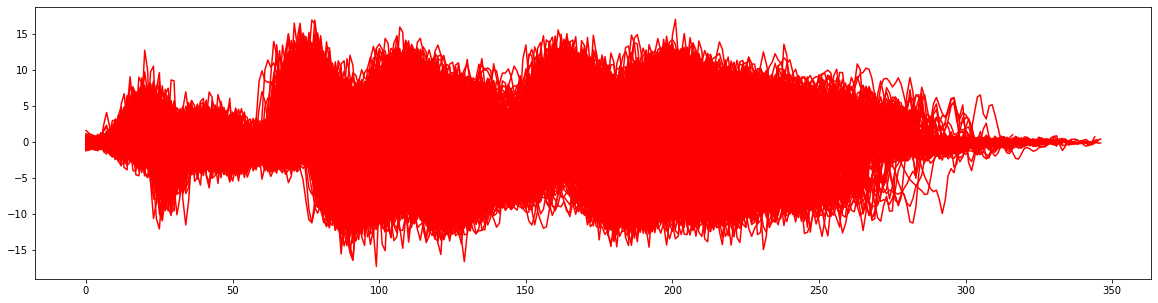

In [18]:
sx1,sy1,sz1=readfile1('./t/')
plt.figure(figsize=(20,5))
for i in sx1:
    plt.plot(i,'r')

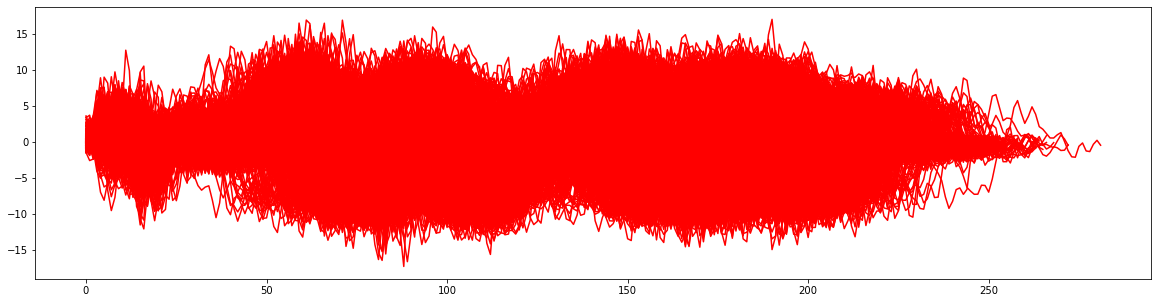

In [19]:
sx2,sy2,sz2=readfile2('./t/')
plt.figure(figsize=(20,5))
for i in sx2:
    plt.plot(i,'r')

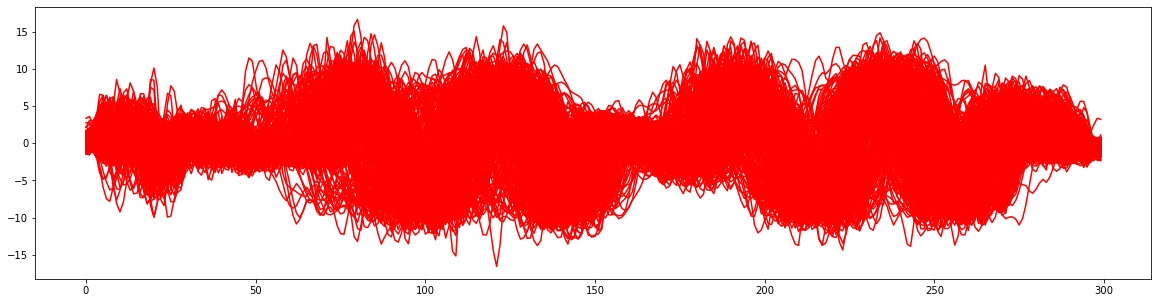

In [20]:
plt.figure(figsize=(20,5))
for i in sx:
    plt.plot(i,'r')

In [21]:
pi=np.array([1,0,0,0])
A=np.array(np.zeros((4,4)))

In [22]:
for i in range(0,3):
    A[i][i]=0.5
    A[i][i+1]=0.5

In [23]:
A[3][3]=1

In [24]:
trained_model_1 = GMMHMM(n_components=4,n_mix=2,n_iter=2000,tol=0.001,init_params='mcw')
trained_model_1.startprob_=pi
trained_model_1.transmat_=A
length_train_x = []
for data in sx:
    length_train_x.append(np.shape(sx)[1])

In [25]:
trained_model_1.fit(np.atleast_2d(np.concatenate(sx)).T,lengths=np.array(length_train_x))

GMMHMM(covars_prior=array([[[-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5]]]),
       covars_weight=array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]]),
       init_params='mcw',
       means_prior=array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]]),
       means_weight=array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]),
       n_components=4, n_iter=2000, n_mix=2, tol=0.001,
       weights_prior=array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]]))

In [26]:
trained_model_2 = GMMHMM(n_components=4,n_mix=2,n_iter=2000,tol=0.001,init_params='mcw')
trained_model_2.startprob_=pi
trained_model_2.transmat_=A
length_train_y= []
for data in sy:
    length_train_y.append(np.shape(sy)[1])
train_data_y=[]
for i in sy:
    train_data_y.append(np.expand_dims(i,axis=0))

In [27]:
trained_model_2.fit(np.atleast_2d(np.concatenate(sy)).T,lengths=np.array(length_train_y))

GMMHMM(covars_prior=array([[[-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5]]]),
       covars_weight=array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]]),
       init_params='mcw',
       means_prior=array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]]),
       means_weight=array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]),
       n_components=4, n_iter=2000, n_mix=2, tol=0.001,
       weights_prior=array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]]))

In [28]:
trained_model_3 = GMMHMM(n_components=4,n_mix=2,n_iter=2000,tol=0.001,init_params='mcw')
trained_model_3.startprob_=pi
trained_model_3.transmat_=A
length_train_z= []
for data in sz:
    length_train_z.append(np.shape(sz)[1])
train_data_z=[]
for i in sz:
    train_data_z.append(np.expand_dims(i,axis=0))

In [29]:
trained_model_3.fit(np.atleast_2d(np.concatenate(sz)).T,lengths=np.array(length_train_z))

GMMHMM(covars_prior=array([[[-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5]]]),
       covars_weight=array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]]),
       init_params='mcw',
       means_prior=array([[[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]],

       [[0.],
        [0.]]]),
       means_weight=array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]]),
       n_components=4, n_iter=2000, n_mix=2, tol=0.001,
       weights_prior=array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]]))

In [30]:
score_x=[]
score_y=[]
score_z=[]

In [31]:
for i in sx:
    tdata = np.expand_dims(i,axis=0)
    score_x.append(trained_model_1.score(tdata.T))

In [32]:
score_x=np.array(score_x)
mean_x=np.mean(score_x/300)
std_x=np.std(score_x/300)

In [33]:
np.sum(score_x/300<mean_x)

186

In [34]:
mean_x

-2.7357870901013883

In [35]:
for i in sy:
    tdata = np.expand_dims(i,axis=0)
    score_y.append(trained_model_2.score(tdata.T))

In [36]:
score_y=np.array(score_y)
mean_y=(np.mean(score_y/300))
std_y=(np.std(score_y/300))

In [37]:
score_y

array([-680.89601396, -787.47642046, -732.12071019, -767.87956614,
       -734.4597726 , -722.79570412, -776.30296085, -730.07242105,
       -745.4825892 , -696.0341401 , -718.63765708, -714.08224018,
       -788.14244347, -776.46024821, -787.95179042, -684.84348114,
       -767.03349059, -724.02395891, -698.72791707, -707.93607695,
       -727.30583825, -762.90317553, -704.14564767, -709.76746304,
       -737.70328809, -773.21607224, -800.77429059, -757.69232394,
       -704.58120401, -768.59533563, -753.9734874 , -777.55084859,
       -707.14569886, -723.64955935, -707.79528088, -730.9708905 ,
       -763.74272251, -776.28564791, -745.50321973, -729.25680795,
       -704.00133326, -780.57223773, -753.61494002, -719.99259933,
       -848.54642183, -701.55449047, -735.20441933, -721.733397  ,
       -717.20710309, -766.70191526, -768.40986374, -747.02073056,
       -715.8534134 , -778.47467902, -695.2049017 , -747.07848314,
       -789.28290966, -763.06079555, -756.74127542, -794.98904

In [38]:
np.sum(score_y/300<mean_y)

178

In [39]:
for i in sz:
    tdata = np.expand_dims(i,axis=0)
    score_z.append(trained_model_3.score(tdata.T))

In [40]:
score_z=np.array(score_z)
mean_z=(np.mean(score_z/300))
std_z=(np.std(score_z/300))

In [41]:
score_z

array([-539.75885272, -569.97146993, -515.9225327 , -567.70866489,
       -492.47648735, -536.82119793, -599.9595187 , -584.93394651,
       -556.3413407 , -532.74205724, -507.12948913, -553.42701886,
       -618.57474423, -605.09874745, -560.35298224, -504.10698322,
       -626.9654359 , -544.60258693, -502.57561605, -479.33384342,
       -475.88770643, -599.68387938, -578.98162563, -498.61421326,
       -626.40636482, -593.1740332 , -629.29376216, -589.15757754,
       -492.2674979 , -558.79984616, -602.58756217, -608.66173713,
       -541.36045332, -567.11094265, -478.44416486, -557.84079155,
       -598.76363556, -617.77769452, -560.95459052, -572.94983388,
       -499.72644864, -574.28669568, -538.35177587, -530.51210184,
       -619.41426849, -523.35235991, -557.9209472 , -556.8813251 ,
       -522.5844052 , -559.41899824, -541.53787766, -658.21001315,
       -560.22314399, -633.16747125, -545.62299477, -553.56892423,
       -681.60937927, -567.71212843, -609.3215179 , -576.13890

In [42]:
path='./test_123/'
data_x=[]
data_y=[]
data_z=[]
hdata_x=[]
hdata_y=[]
hdata_z=[]
dirs = os.listdir(path)
for files in dirs:
    test_x,test_y,test_z=readtestfile(join(path+files+'/'),bzc,bzcy,bzcz)
    if files=='hjl':
        continue
    else:
        scoretest_x=[]
        for i in test_x:
            tdata = np.expand_dims(i,axis=0)
            scoretest_x.append(trained_model_1.score(tdata.T)/300)
        data_x.append(scoretest_x)
        scoretest_y=[]
        for i in test_y:
            tdata = np.expand_dims(i,axis=0)
            scoretest_y.append(trained_model_2.score(tdata.T)/300)
        data_y.append(scoretest_y)
        scoretest_z=[]
        for i in test_z:
            tdata = np.expand_dims(i,axis=0)
            scoretest_z.append(trained_model_3.score(tdata.T)/300)
        data_z.append(scoretest_z)

In [43]:
testh_x,testh_y,testh_z=readtestfilet('./t/',bzc,bzcy,bzcz,test2)

In [44]:
for i in testh_x:
    tdata = np.expand_dims(i,axis=0)
    hdata_x.append(trained_model_1.score(tdata.T)/300)
for i in testh_y:
    tdata = np.expand_dims(i,axis=0)
    hdata_y.append(trained_model_2.score(tdata.T)/300)
for i in testh_z:
    tdata = np.expand_dims(i,axis=0)
    hdata_z.append(trained_model_3.score(tdata.T)/300)

In [45]:
far=[]
frr=[]
f=[]
list=np.arange(2.4,3,0.1)
for i in list:
    count_t=0
    for j in range(0,19):
        for k in range(0,len(data_x[j])):
            flag=0
            if((data_x[j][k]>(mean_x-i*std_x))):
                flag=flag+1
            if((data_y[j][k]>(mean_y-i*std_y))):
                flag=flag+1
            if((data_z[j][k]>(mean_z-i*std_z))):
                flag=flag+1
            if flag>=3:
                count_t=count_t+1
    far.append(count_t/760)
    count_ht=0
    for j in range(0,len(hdata_x)):
        flag=0
        if((hdata_x[j]>(mean_x-i*std_x))):
            flag=flag+1
        if((hdata_y[j]>(mean_y-i*std_y))):
            flag=flag+1
        if((hdata_z[j]>(mean_z-i*std_z))):
            flag=flag+1
        if flag>=3:
            count_ht=count_ht+1
#             print(j)
    frr.append((800-count_ht)/800)

In [46]:
len(hdata_x)

800

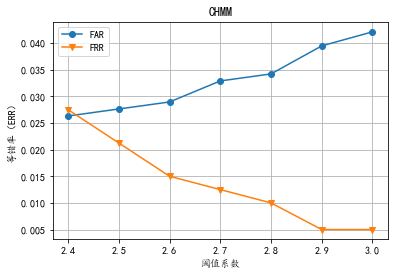

In [47]:
plt.rcParams['font.family']=['KaiTi']
plt.plot(list,far,marker='o',label='FAR')
plt.plot(list,frr,marker='v',label='FRR')
plt.title("CHMM")
# plt.xticks(list)
# plt.yticks(list)
plt.grid()
plt.xlabel("阈值系数")
plt.ylabel("等错率（ERR）")
plt.legend()